# Load all files

In [1]:
import os
import re
import csv

import pandas
import matplotlib.pyplot as plt

In [2]:
rootdir = "./"

In [3]:
problem_dir = {}

In [4]:
problems = ["count","max","min"]
sub_problems = ["light-head-3","light-head-9","heavy-head-3","heavy-head-9"]
strategies = ["no-body","rewrite","replace"]

In [6]:
for problem in problems:
    problem_dir[problem] = {}
    problem_dir[problem]["regex"] = regex = re.compile(f'.*{problem}.*')
    problem_dir[problem]["sub_problems"] = {}
    for sub_problem in sub_problems:
        sub_problem_dir = {}
        sub_problem_dir["regex"] = re.compile(f'.*{sub_problem}.*')
        sub_problem_dir["strategies"] = {}
        
        problem_dir[problem]["sub_problems"][sub_problem] = sub_problem_dir
        
        
        for strategy in strategies:
            strategy_dir = {}
            strategy_dir = {}
            strategy_dir["regex"] = re.compile(f'.*{strategy}.*')
            strategy_dir["file_names"] = []
            
            problem_dir[problem]["sub_problems"][sub_problem]["strategies"][strategy] = strategy_dir
            

In [9]:

for root, dirs, files in os.walk(rootdir):
    for file in files:
        for problem in problems:
            if problem in str(file):
                for sub_problem in sub_problems:
                    if sub_problem in str(file):
                        for strategy in strategies:
                            if strategy in str(file):
                                print(f">>{problem}>>{sub_problem}>>{strategy}")
                                print(file)
                                
                                problem_dir[problem]["sub_problems"][sub_problem]["strategies"][strategy]["file_names"].append(str(file))
                                
        



>>count>>light-head-3>>rewrite
05-count-rewrite-light-head-3_grounding_time.csv
>>min>>heavy-head-9>>no-body
20-min-no-body-clique-heavy-head-9_grounding_size.csv
>>min>>heavy-head-3>>no-body
19-min-no-body-clique-heavy-head-3_grounding_time.csv
>>max>>heavy-head-9>>no-body
16-max-no-body-clique-heavy-head-9_grounding_time.csv
>>max>>heavy-head-9>>no-body
16-max-no-body-clique-heavy-head-9_total_time.csv
>>count>>heavy-head-3>>replace
11-count-replace-heavy-head-3_grounding_size.csv
>>max>>heavy-head-3>>no-body
15-max-no-body-clique-heavy-head-3_grounding_size.csv
>>count>>heavy-head-3>>no-body
03-count-rewrite-no-body-clique-heavy-head-3_total_time.csv
>>count>>heavy-head-3>>rewrite
03-count-rewrite-no-body-clique-heavy-head-3_total_time.csv
>>count>>heavy-head-3>>replace
11-count-replace-heavy-head-3_total_time.csv
>>count>>heavy-head-3>>no-body
03-count-no-body-clique-heavy-head-3_grounding_time.csv
>>max>>heavy-head-3>>no-body
15-max-rewrite-no-body-clique-heavy-head-3_grounding_si

In [18]:
problem_dir

{'count': {'regex': re.compile(r'.*count.*', re.UNICODE),
  'sub_problems': {'light-head-3': {'regex': re.compile(r'.*light-head-3.*',
    re.UNICODE),
    'strategies': {'no-body': {'regex': re.compile(r'.*no-body.*', re.UNICODE),
      'file_names': ['01-count-no-body-clique-light-head-3_total_time.csv',
       '01-count-no-body-clique-light-head-3_grounding_size.csv',
       '01-count-no-body-clique-light-head-3_grounding_time.csv',
       '01-count-no-body-clique-light-head-3_total_time.csv',
       '01-count-no-body-clique-light-head-3_grounding_size.csv',
       '01-count-no-body-clique-light-head-3_grounding_time.csv',
       '01-count-no-body-clique-light-head-3_total_time.csv',
       '01-count-no-body-clique-light-head-3_grounding_size.csv',
       '01-count-no-body-clique-light-head-3_grounding_time.csv']},
     'rewrite': {'regex': re.compile(r'.*rewrite.*', re.UNICODE),
      'file_names': ['05-count-rewrite-light-head-3_grounding_time.csv',
       '05-count-rewrite-light-

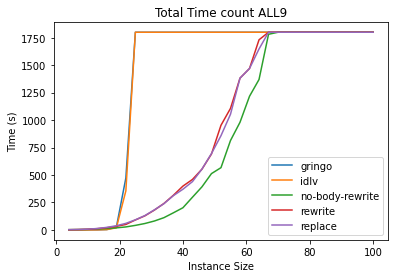

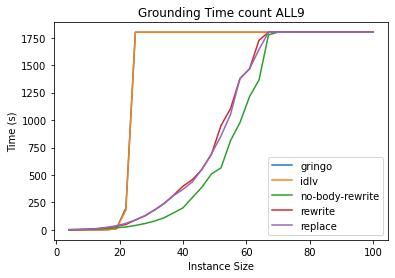

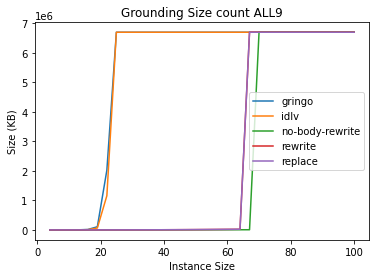

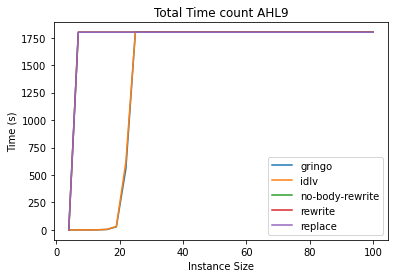

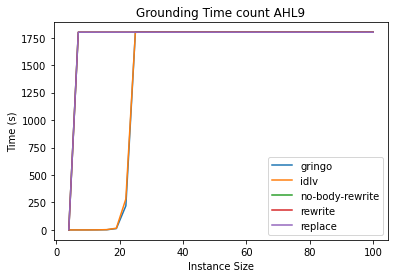

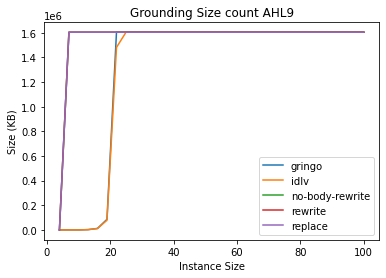

In [74]:
problem = "count"
cur_sub_problems = ["light-head-9","heavy-head-9"]
cur_sub_problems = ["light-head-9","heavy-head-9"]

for sub_problem in cur_sub_problems:
    dir_ = problem_dir[problem]["sub_problems"][sub_problem]

    total_time_files = []
    grounding_time_files = []
    grounding_size_files = []

    for strategy in strategies:
        files = dir_["strategies"][strategy]["file_names"]

        for file in files:
            if "total_time" in file:
                total_time_files.append((strategy,file))
            elif "grounding_time" in file:
                grounding_time_files.append((strategy,file))
            elif "grounding_size" in file:
                grounding_size_files.append((strategy,file))
            else: 
                assert(False)
                
    total_time_files = list(set(total_time_files))
    grounding_time_files = list(set(grounding_time_files))
    grounding_size_files = list(set(grounding_size_files))
    
                
    plotting_code(total_time_files, "Total Time", "total_time", "Time (s)")
    plotting_code(grounding_time_files, "Grounding Time", "grounding_time", "Time (s)")
    plotting_code(grounding_size_files, "Grounding Size", "grounding_size", "Size (KB)")


In [12]:
total_time_files

[('no-body', '01-count-no-body-clique-light-head-3_total_time.csv'),
 ('no-body', '01-count-no-body-clique-light-head-3_total_time.csv'),
 ('no-body', '01-count-no-body-clique-light-head-3_total_time.csv'),
 ('rewrite', '05-count-rewrite-light-head-3_total_time.csv'),
 ('rewrite', '05-count-rewrite-light-head-3_total_time.csv'),
 ('rewrite', '05-count-rewrite-light-head-3_total_time.csv'),
 ('replace', '09-count-replace-light-head-3_total_time.csv'),
 ('replace', '09-count-replace-light-head-3_total_time.csv'),
 ('replace', '09-count-replace-light-head-3_total_time.csv')]

# Final plotting code

In [73]:

def plotting_code(files, title_prefix, image_prefix, y_axis_label):
    ds = []

    data_frame_strategy = None
    data_frame = None

    for strategy, file in files:
        data = pandas.read_csv(file, delimiter=',')
        
        strategy = strategy.replace("-","_")

        rename_dir = {}
        for col in data.columns:
            if str(col) == "newground-duration":
                rename_dir[col] = f"{strategy.replace('-','_')}"
                                
                for instance in data.instance:
                    cur_time = data.loc[data.instance == instance, col]
                    if int(cur_time) > 1800:
                        data.loc[data.instance == instance, col] = 1800 
            if str(col) == "newground-timeout-occured":
                rename_dir[col] = f"{strategy.replace('-','_')}_timeout_occured"
            if str(col) == "gringo-duration":
                rename_dir[col] = f"gringo"
                
                for instance in data.instance:
                    cur_time = data.loc[data.instance == instance, col]
                    if int(cur_time) > 1800:
                        data.loc[data.instance == instance, col] = 1800 
                                    
            if str(col) == "idlv-duration":
                rename_dir[col] = f"idlv"
                
                for instance in data.instance:
                    cur_time = data.loc[data.instance == instance, col]
                    if int(cur_time) > 1800:
                        data.loc[data.instance == instance, col] = 1800 
                
            if str(col) == "newground-size":
                rename_dir[col] = f"{strategy.replace('-','_')}"
                
                max_val = 0
                for item in list(data["newground-size"]):
                    if float(item) > max_val:
                        max_val = float(item)
                for item in list(data["gringo-size"]):
                    if float(item) > max_val:
                        max_val = float(item)
                for item in list(data["idlv-size"]):
                    if float(item) > max_val:
                        max_val = float(item)                

                
                for instance in data.instance:
                    timeout_occured = ((list(data.loc[data.instance == instance, "newground-timeout-occured"]))[0])

                    #timeout_occured = bool(str(data.loc[data.instance == instance, "newground-timeout-occured"]))
                    if timeout_occured == True:
                        data.loc[data.instance == instance, col] = max_val

            if str(col) == "gringo-size":
                rename_dir[col] = f"gringo"
                
                max_val = 0
                for item in list(data["newground-size"]):
                    if float(item) > max_val:
                        max_val = float(item)
                for item in list(data["gringo-size"]):
                    if float(item) > max_val:
                        max_val = float(item)
                for item in list(data["idlv-size"]):
                    if float(item) > max_val:
                        max_val = float(item)                

                
                for instance in data.instance:
                    timeout_occured = ((list(data.loc[data.instance == instance, "gringo-timeout-occured"]))[0])

                    #timeout_occured = bool(str(data.loc[data.instance == instance, "newground-timeout-occured"]))
                    if timeout_occured == True:
                        data.loc[data.instance == instance, col] = max_val               
                
            if str(col) == "idlv-size":
                rename_dir[col] = f"idlv"
                
                max_val = 0
                for item in list(data["newground-size"]):
                    if float(item) > max_val:
                        max_val = float(item)
                for item in list(data["gringo-size"]):
                    if float(item) > max_val:
                        max_val = float(item)
                for item in list(data["idlv-size"]):
                    if float(item) > max_val:
                        max_val = float(item)                

                
                for instance in data.instance:
                    timeout_occured = ((list(data.loc[data.instance == instance, "idlv-timeout-occured"]))[0])

                    #timeout_occured = bool(str(data.loc[data.instance == instance, "newground-timeout-occured"]))
                    if timeout_occured == True:
                        data.loc[data.instance == instance, col] = max_val

            # TODO -> Add different stuff for grounding-size

        data.rename(columns = rename_dir, inplace = True)

        if data_frame is None:
            data_frame_strategy = strategy
            data_frame = pandas.DataFrame(data)
        else:
            data_frame[strategy] = data[strategy]
            data_frame[f"{strategy}_timeout_occured"] = data[f"{strategy}_timeout_occured"]

    # ---- (Why is this red?)
    # Instances to integers (for plotting)
    for instance in data_frame.instance:
        data_frame.loc[data_frame.instance == instance, 'instance'] = int((str(instance).split("_"))[1].split(".")[0])

    x = list(data_frame.instance)
    gringo = list(data_frame.gringo)
    idlv = list(data_frame.idlv)
    no_body = list(data_frame.no_body)
    rewrite = list(data_frame.rewrite)
    replace = list(data_frame["replace"])

    fig, ax = plt.subplots()

    ax.plot(x, gringo, label = "gringo")
    ax.plot(x, idlv, label = "idlv")
    ax.plot(x, no_body, label = "no-body-rewrite")
    ax.plot(x, rewrite, label = "rewrite")
    ax.plot(x, replace, label = "replace")
    ax.set_xlabel("Instance Size")
    ax.set_ylabel(y_axis_label)
    ax.legend()
    
    sub_problem_resolver = {}
    sub_problem_resolver["light-head-3"] = "ALPC3"
    sub_problem_resolver["light-head-9"] = "ALL9"
    sub_problem_resolver["heavy-head-3"] = "AHPC3"
    sub_problem_resolver["heavy-head-9"] = "AHL9"
    
    ax.set_title(f"{title_prefix} {problem} {sub_problem_resolver[sub_problem]}")

    fig.savefig(f"images/{image_prefix}_{problem}_{sub_problem_resolver[sub_problem]}.png", dpi=500)
    plt.show()

In [7]:
bounds_total_time_data = pandas.read_csv("26-bounds-test_total_time.csv", delimiter=',')
bounds_grounding_time_data = pandas.read_csv("26-bounds-test_grounding_time.csv", delimiter=',')
bounds_grounding_size_data = pandas.read_csv("26-bounds-test_grounding_size.csv", delimiter=',')

In [8]:
bounds_total_time_data

,instance,gringo-duration,gringo-timeout-occured,idlv-duration,idlv-timeout-occured,newground-duration,newground-timeout-occured
0,2,0,False,0,False,91.261164,False
1,5,0,False,0,False,91.533672,False
2,8,0,False,0,False,93.507805,False
3,11,0,False,0,False,93.008157,False
4,14,0,False,0,False,93.769130,False
...,...,...,...,...,...,...,...
328,986,0,False,0,False,76.181447,False
329,989,0,False,0,False,75.163678,False
330,992,0,False,0,False,76.009191,False
331,995,0,False,0,False,76.019608,False


In [10]:
# THE FOLLOWING CODE SNIPPET RENAMES 'rewrite-no-body' files to 'no-body'
"""
regex = re.compile('.*-rewrite-no-body-.*')

for root, dirs, files in os.walk(rootdir):
    for file in files:
        
        if regex.match(file):
            splits = str(file).split("rewrite-no-body")
            new_name = f"{splits[0]}no-body{splits[1]}"

            os.rename(str(file),new_name)
"""

'\nregex = re.compile(\'.*-rewrite-no-body-.*\')\n\nfor root, dirs, files in os.walk(rootdir):\n    for file in files:\n        \n        if regex.match(file):\n            splits = str(file).split("rewrite-no-body")\n            new_name = f"{splits[0]}no-body{splits[1]}"\n\n            os.rename(str(file),new_name)\n'